In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
applicants_data_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/summative/processed_applicants_data.csv")
applicants_data_df.head(5)

,Age,Gender,education_level_Diploma certificate,education_level_High school,education_level_Masters Degree,education_level_Primary school,education_level_University,father_alive,final_status_Active,final_status_Dropped,...,neighborhood_Village,no_of_siblings,own_dependants,prev_student,rent_house,source,tech_experience,used_computer,work_experience,admissions_decision
0,25,1,0,0,0,0,1,1,0,0,...,1,4,0,0,0,0,1,1,1,1
1,22,0,0,1,0,0,0,1,1,0,...,1,1,0,0,0,0,1,1,1,0
2,20,0,0,1,0,0,0,1,0,0,...,0,3,0,0,0,0,1,1,1,1
3,20,0,0,1,0,0,0,1,0,0,...,1,4,0,0,0,0,0,1,0,1
4,21,1,1,0,0,0,0,1,0,0,...,1,3,0,0,0,1,1,1,1,1


In [ ]:
applicants_data_df.columns.tolist()

['Age',
 'Gender',
 'education_level_Diploma certificate',
 'education_level_High school',
 'education_level_Masters Degree',
 'education_level_Primary school',
 'education_level_University',
 'father_alive',
 'final_status_Active',
 'final_status_Dropped',
 'final_status_Rejected',
 'got_scholarship',
 'guardian_dependants',
 'has_guardian',
 'have_source_of_income',
 'joining_university',
 'location',
 'marital_status',
 'mother_alive',
 'neighborhood_Court',
 'neighborhood_Estate',
 'neighborhood_Slum',
 'neighborhood_Village',
 'no_of_siblings',
 'own_dependants',
 'prev_student',
 'rent_house',
 'source',
 'tech_experience',
 'used_computer',
 'work_experience',
 'admissions_decision']

In [ ]:
# drop columns that we dont want to be part of the features because applicants did not give us said column data
applicants_df = applicants_data_df.drop(["final_status_Active","final_status_Dropped","final_status_Rejected", "location" ], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X = applicants_df.drop("admissions_decision", axis=1)
Y = applicants_df["admissions_decision"]



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [ ]:
x_train.shape, y_train.shape

((1498, 27), (1498,))

In [ ]:
y_train.value_counts()

1    1246
0     252
Name: admissions_decision, dtype: int64

In [ ]:
y_test.value_counts()

1    312
0     63
Name: admissions_decision, dtype: int64

In [ ]:
x_test.shape, y_test.shape

((375, 27), (375,))

In [ ]:
from collections import Counter
Counter(y_test.tolist())

Counter({0: 63, 1: 312})

## XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
param = { 
    'max_depth': 4,
    'eta': 0.3,
    'objective':'multi:softmax',
    'num_class': 2
}
epochs = 10

In [ ]:
train = xgb.DMatrix( x_train, label=y_train)
test = xgb.DMatrix( x_test, label=y_test)

In [ ]:
model = xgb.train( param, train, epochs)

In [ ]:
predictions = model.predict(test)

In [ ]:
predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))
print('--------------------------------------------------------')
print("")

              precision    recall  f1-score   support

           0       0.50      0.02      0.03        63
           1       0.83      1.00      0.91       312

    accuracy                           0.83       375
   macro avg       0.67      0.51      0.47       375
weighted avg       0.78      0.83      0.76       375

--------------------------------------------------------



## Random forest

In [ ]:
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn import tree # for decision tree models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [ ]:

##### Step 3
# Set model and its parameters
model = RandomForestClassifier(
                              )
AdaBoost = AdaBoostClassifier(base_estimator=model, n_estimators=400,learning_rate=1)
# Fit the model
clf = AdaBoost.fit(x_train, y_train)


##### Step 4
# Predict class labels on training data
pred_labels_tr = clf.predict(x_train)
# Predict class labels on a test data
pred_labels_te = clf.predict(x_test)


##### Step 5 - Model summary
# Basic info about the model
# print('*************** Model Summary ***************')
# print('Classes: ', clf.classes_)
# print('No. of outputs: ', clf.n_outputs_)
# print('No. of features: ', clf.n_features_in_)
# print('No. of Estimators: ', len(clf.estimators_))
# print('--------------------------------------------------------')
# print("")

print('*************** Evaluation on Test Data ***************')
score_te = clf.score(x_test, y_test)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model
print(classification_report(y_test, pred_labels_te))
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Training Data ***************')
score_tr = clf.score(x_train, y_train)
print('Accuracy Score: ', score_tr)
# Look at classification report to evaluate the model
print(classification_report(y_train, pred_labels_tr))
print('--------------------------------------------------------')

*************** Evaluation on Test Data ***************
Accuracy Score:  0.8293333333333334
              precision    recall  f1-score   support

           0       0.40      0.03      0.06        63
           1       0.84      0.99      0.91       312

    accuracy                           0.83       375
   macro avg       0.62      0.51      0.48       375
weighted avg       0.76      0.83      0.76       375

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00      1246

    accuracy                           1.00      1498
   macro avg       1.00      1.00      1.00      1498
weighted avg       1.00      1.00      1.00      1498

--------------------------------------------------------


In [ ]:
#print(pred_labels_te)
print(Counter(pred_labels_te))

Counter({1: 370, 0: 5})


## Logistic Model

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train)

In [ ]:
y_pred = logistic_model.predict(x_test)

In [ ]:
pred_results =pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
print("accuracy_score : ", acc) # how many of the predicted applicants value did the model predict correct
print("precision_score : ", prec) # how many of the applicants that the model thought admitted actualy were admitted
print("recall_score : ", recall) # how many of the actual applicants did the model correctly predict

accuracy_score :  0.7946666666666666
precision_score :  0.7941176470588235
recall_score :  1.0


In [ ]:
#Building Model again with best params
lr2=LogisticRegression(class_weight={0: 0.622, 1: 0.377},C=0.5,penalty="l2", solver='liblinear')
lr2.fit(x_train,y_train)

LogisticRegression(C=0.5, class_weight={0: 0.622, 1: 0.377}, solver='liblinear')

In [ ]:
y_pred = lr2.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
print("accuracy_score : ", acc) # how many of the predicted applicants value did the model predict correct
print("precision_score : ", prec) # how many of the applicants that the model thought admitted actualy were admitted
print("recall_score : ", recall) # how many of the actual applicants did the model correctly predict

accuracy_score :  0.792
precision_score :  0.7951482479784366
recall_score :  0.9932659932659933


## DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn import tree # for decision tree models

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import graphviz # for plotting decision tree graphs

In [ ]:
def fitting(X, y, criterion, splitter, mdepth, clweight, minleaf):

    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model = tree.DecisionTreeClassifier(criterion=criterion, 
                                        splitter=splitter, 
                                        max_depth=mdepth,
                                        class_weight=clweight,
                                        min_samples_leaf=minleaf, 
                                        random_state=42
                                  )
    clf = model.fit(X_train, y_train)

    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)

    # Tree summary and model evaluation metrics
    print('*************** Tree Summary ***************')
    print('Classes: ', clf.classes_)
    print('Tree Depth: ', clf.tree_.max_depth)
    print('No. of leaves: ', clf.tree_.n_leaves)
    print('No. of features: ', clf.n_features_in_)
    print('--------------------------------------------------------')
    print("")
    
    print('*************** Evaluation on Test Data ***************')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("")
    
    print('*************** Evaluation on Training Data ***************')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    
 
    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf, model

In [ ]:
import numpy as np
def Plot_3D(X, X_test, y_test, clf, x1, x2, mesh_size, margin):
            
    # Specify a size of the mesh to be used
    mesh_size=mesh_size
    margin=margin

    # Create a mesh grid on which we will run our model
    x_min, x_max = X.iloc[:, 0].fillna(X.mean()).min() - margin, X.iloc[:, 0].fillna(X.mean()).max() + margin
    y_min, y_max = X.iloc[:, 1].fillna(X.mean()).min() - margin, X.iloc[:, 1].fillna(X.mean()).max() + margin
    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    xx, yy = np.meshgrid(xrange, yrange)
            
    # Calculate predictions on grid
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Create a 3D scatter plot with predictions
    fig = px.scatter_3d(x=X_test[x1], y=X_test[x2], z=y_test,
                     opacity=0.8, color_discrete_sequence=['black'])

    # Set figure title and colors
    fig.update_layout(#title_text="Scatter 3D Plot with CART Prediction Surface",
                      paper_bgcolor = 'white',
                      scene = dict(xaxis=dict(title=x1,
                                              backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'),
                                   yaxis=dict(title=x2,
                                              backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'
                                              ),
                                   zaxis=dict(title='Probability of Rain Tomorrow',
                                              backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0', 
                                              )))
    
    # Update marker size
    fig.update_traces(marker=dict(size=1))

    # Add prediction plane
    fig.add_traces(go.Surface(x=xrange, y=yrange, z=Z, name='CART Prediction',
                              colorscale='Jet',
                              reversescale=True,
                              showscale=False, 
                              contours = {"z": {"show": True, "start": 0.5, "end": 0.9, "size": 0.5}}))
    fig.show()
    return fig

In [ ]:


# Fit the model and display results
X_train, X_test, y_train, y_test, clf,trained_model = fitting(X, Y, 'gini', 'best', 
                                                       mdepth=1, 
                                                       clweight=None,
                                                       minleaf=1000)


*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  0
No. of leaves:  1
No. of features:  27
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.8186666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.82      1.00      0.90       307

    accuracy                           0.82       375
   macro avg       0.41      0.50      0.45       375
weighted avg       0.67      0.82      0.74       375

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.835113484646195
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       247
           1       0.84      1.00      0.91      1251

    accuracy                           0.84      1498
   macro avg       0.42      0.50    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

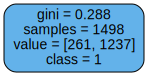

In [ ]:
graph

##  

In [ ]:
X_train, X_test, y_train, y_test, clf, trained_model= fitting(X, Y, 'gini', 'best', 
                                                       mdepth=3, 
                                                       clweight=None, 
                                                       minleaf=1000)



*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  0
No. of leaves:  1
No. of features:  27
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.8186666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.82      1.00      0.90       307

    accuracy                           0.82       375
   macro avg       0.41      0.50      0.45       375
weighted avg       0.67      0.82      0.74       375

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.835113484646195
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       247
           1       0.84      1.00      0.91      1251

    accuracy                           0.84      1498
   macro avg       0.42      0.50    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
print(len(x_test.columns.tolist()))
for i in x_test.columns.tolist():
    print(i)

27
Age
Gender
education_level_Diploma certificate
education_level_High school
education_level_Masters Degree
education_level_Primary school
education_level_University
father_alive
got_scholarship
guardian_dependants
has_guardian
have_source_of_income
joining_university
marital_status
mother_alive
neighborhood_Court
neighborhood_Estate
neighborhood_Slum
neighborhood_Village
no_of_siblings
own_dependants
prev_student
rent_house
source
tech_experience
used_computer
work_experience


In [ ]:
def applicant_source(source):
    # student souce can either be partner or non partner
    # so this function will work on making souce column to either be parner or non partner
    none_partner = ["university", "Whatsapp", "Moringa", "friend", "mentor", "student","LinkedIn" ]
    source = str(source)
    for i in none_partner:
        if i in source or i.lower() in source:
            return 0 #for none partner
    return 1 # for parther 

In [ ]:
def one_hot_encode_edu(education): # -> returns a list 
    """
    education_level_Diploma certificate
    education_level_High school
    education_level_Masters Degree
    education_level_Primary school
    education_level_University
    """
    a, b, c, d, e = 0, 0,0,0,0

    if "diploma" in education.lower():
        a = 1
    elif "high" in  education.lower():
        b = 1
    elif "masters" in  education.lower():
        c = 1
    elif "primary" in  education.lower():
        d = 1
    else:
        e = 1
    return [ a, b, c, d, e]


In [ ]:
def one_hot_encode_neigh(neighbourhood):
    """
    neighborhood_Court
    neighborhood_Estate
    neighborhood_Slum
    neighborhood_Village
    """
    a, b, c, d = 0, 0, 0, 0
    
    if "court" in neighbourhood.lower():
        a = 1
    elif "estate" in  neighbourhood.lower():
        b = 1
    elif "slum" in  neighbourhood.lower():
        c = 1
    else:
        d = 1
    return [ a, b, c, d]



In [ ]:
def _yes_no(text):
    if text.lower() == "yes":
        return 1 
    else: 
        return 0 

In [ ]:
dictionary = {'no': 0, 'none': 0, 'nan': 0, 'non': 0, 'nill': 0, 'n/a': 0, 'no one': 0, 'not applicable': 0, 'i have no guardians': 0, "i don't know": 1, 'only me': 1, '2 children': 2, '3 people': 3, 'three people': 3, '5 people': 5, '6 people': 6, '7 people': 7, '8 people': 8, '10 or more': 10, '10 people': 10, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '12': 10}
def convert_dependants_and_siblings_to_int(text):
    if type(text) == int:
        return text if text <10 else 10
    value = str(text).strip().replace('.',"").lower()
    if  value in dictionary:
        return dictionary[value]
    else:
        return 0


In [ ]:
def _clean_csv(arr):
    out = []

    # Age
    age = int(arr[0])
    out.append(age)

    #Gender Female = 0, Male = 1 
    gender = arr[1]
    if gender.strip().lower() == 'male': out.append(1)
    else: out.append( 0)

    # Education level 
    col_encode = one_hot_encode_edu(arr[2])
    out.extend(col_encode)

    # Father alive 
    out.append ( _yes_no( arr[3]))

    # prev schoolarship beneficiary 
    out.append ( _yes_no( arr[4]))

    # dependants on guardian 
    dependants = convert_dependants_and_siblings_to_int( arr[5])
    out.append( dependants)

    # has guardian 
    out.append ( _yes_no( arr[6]))

    # has income source 
    out.append ( _yes_no( arr[7]))
    
    # plans to join another university 
    out.append ( _yes_no( arr[8]))


    # is in a domestic partnership  
    out.append ( _yes_no( arr[9]))

    # Mother alive   
    out.append ( _yes_no( arr[10]))

    # neighbourhood
    col_encode2 = one_hot_encode_neigh(arr[11])
    out.extend(col_encode2)
    
    # siblings of applicant 
    siblings = convert_dependants_and_siblings_to_int( arr[12])
    out.append( siblings)

     # dependants on applicant 
    dependants2 = convert_dependants_and_siblings_to_int( arr[13])
    out.append( dependants2)

    # Is previously a student   
    out.append ( _yes_no( arr[14]))

    # rents house 
    out.append ( _yes_no( arr[15]))

    # applicant source 
    souce = applicant_source( arr[16])
    out.append(souce)

    # Has tech experience 
    out.append ( _yes_no( arr[17]))

    # Used a computer 
    out.append ( _yes_no( arr[18]))

    # has work experience 
    out.append ( _yes_no( arr[19]))

    
    return out

In [ ]:
def helper(index):
  obj = {
      1:"age", 2:"gender", 3:"education_level", 4:"father_alive", 5:"prev_scholarship", 6:"num_dependants", 7:"has_guardian",  8:"has_income", 9:"another_university",
            10:"marital_status",  11:"mother_alive", 12:"neighborhood", 13:"no_siblings",  14:"dependants", 15:"prev_student", 16:"rent",17:"source", 18:"tech_experience",  19:"used_comp", 20: "work_experience"
  }
  return obj[index]

In [ ]:

def clean_csv(csv): 
    datas = pd.read_csv(csv)
    print(1)
    arr = datas.values.tolist()
    print(2)
    out = []
    for applicant in arr:
        output_temp = {}
        reasons = []
        email = applicant[0]
        print("Here", email)

        data = applicant[1:]
        temp = [_clean_csv(data)]
        print(temp)
        res = pd.DataFrame(temp, columns = x_test.columns.tolist())
        temp_reason = []
        result = clf.predict(res)
        if result[0] == 0: # means reject
          temp_reason = []
          for index, item in enumerate(temp):
            temp_ = temp
            if temp_[index] == 1: temp_[index] = 0
            elif temp_[index] == 0: temp_[index] = 1
            res = pd.DataFrame(temp_, columns = x_test.columns.tolist())
            result_ = clf.predict(res)
            if result_[0] == 1: # means accepted falsely
             reasons.append( helper(index))


        output_temp['email'] = email
        if result[0] == 1:
            output_temp['recommendation'] = "Admit - Under Scholarship"
            output_temp['reason'] =""     
        else:
           output_temp['recommendation'] = "Reject -  Under Scholarship"
        output_temp['reason'] = reasons
        out.append(output_temp)
    return out 

In [ ]:
# clean_csv("dummy_data-20220402-123926.csv")

In [ ]:
!pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
import string 

def is_csv(infile):
    try:
        with open(infile, newline='') as csvfile:
            start = csvfile.read(4096)

            # isprintable does not allow newlines, printable does not allow umlauts...
            if not all([c in string.printable or c.isprintable() for c in start]):
                return False
            dialect = csv.Sniffer().sniff(start)
            return True
    except csv.Error:
        # Could not get a csv dialect -> probably not a csv.
        return False

In [ ]:
# -> takes in a csv file and returns an array of len 27
import anvil.media
import pathlib
import csv

@anvil.server.callable
def load_data_colab(csv_file):

  with anvil.media.TempFile(csv_file) as filename:
    if is_csv(filename):
      try:
        return clean_csv(filename)

      except AttributeError: # check if its correct csv file
        return "AttributeError"
    else:
      return "Wrong File Uploaded"




In [ ]:
is_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/summative/processed_applicants_data.csv")

True

In [ ]:
!pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
import anvil.server


In [ ]:
anvil.server.connect("7TICLXZPOE6AXCRFRBSY76JA-JPG3HHS3PATSMBZT")


In [ ]:
print("hehe")

hehe


In [ ]:
data.to_dict('records')